<a href="https://colab.research.google.com/github/Nagasrineelamshetty/AIML/blob/main/Module1Lab2AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. How does the validation set percentage affect accuracy?

 Increasing the percentage of the validation set:
 As more data is allocated to validation, less data is left for training. This can lead to underfitting because the model doesn't have enough training data to learn patterns effectively.
 The validation accuracy may become less reliable as it represents a smaller fraction of the overall data.

 Decreasing the percentage of the validation set:
 A small validation set means the model has more training data, but the validation accuracy might be noisy since it's computed over a smaller dataset.

2. Effect of train-validation split on test accuracy prediction:
A larger training set generally helps the model learn better, leading to better test accuracy.
A small validation set may fail to generalize, producing an inaccurate estimation of test accuracy.
A large validation set improves the reliability of accuracy estimation but reduces the training set size, which can degrade the model's performance.
3. Ideal validation set percentage:
A good balance is typically 20% for validation and 80% for training. However, this depends on the size of the dataset:
For large datasets, a smaller percentage (e.g., 5-10%) might suffice for validation.
For small datasets, a larger percentage (e.g., 20-30%) ensures reliable validation results.



Accuracy of 1-NN with noise: 0.8333
Accuracy of 3-NN with noise: 0.8000


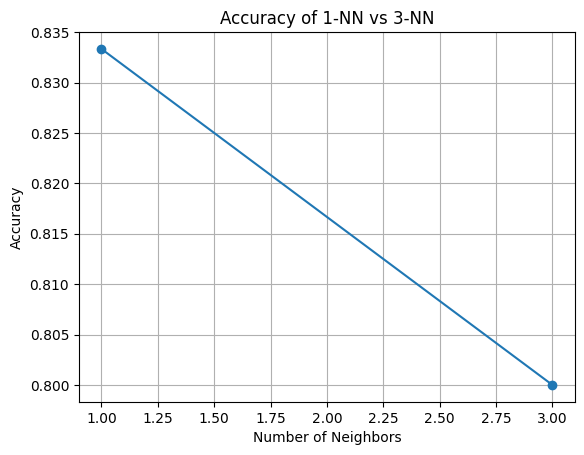

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Add noise to the dataset
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 0.5, X.shape)  # Add Gaussian noise
X_noisy = X + noise

# Split the noisy dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Train 1-NN and 3-NN classifiers
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Print the accuracy results with noisy data
print(f"Accuracy of 1-NN with noise: {accuracy_1:.4f}")
print(f"Accuracy of 3-NN with noise: {accuracy_3:.4f}")

neighbors = [1, 3]
accuracies = [accuracy_1, accuracy_3]

plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy of 1-NN vs 3-NN')
plt.grid(True)
plt.show()



 1.Does averaging the validation accuracy across multiple splits give more consistent results?

Yes, averaging the validation accuracy across multiple splits (known as cross-validation) does provide more consistent results. This is because you are evaluating the model on different subsets of the data, reducing the variability that might result from using just one train-test split. If you only use a single train-test split, the results could be biased by the specific data points chosen, especially if they aren't representative of the overall dataset.

 Why it's consistent:
 By using multiple splits, you're testing the model on various portions of the data, which reduces the potential for overfitting or underfitting to any particular split.
For example, 5-fold cross-validation means the model is trained and evaluated 5 times, each time on different data, and then the results are averaged.

2. Does it give a more accurate estimate of test accuracy?
Yes, averaging across multiple splits gives a more accurate estimate of how the model is likely to perform on unseen data.
Cross-validation helps us generalize better to new, unseen data because the model is trained and tested on different subsets of data. This results in a more robust evaluation of the model's performance.
If you only test on one hold-out set, your evaluation might be overly optimistic or pessimistic based on that particular set. By averaging across multiple splits, you get a more reliable estimate of the model's true performance.
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

 Yes, more iterations typically lead to better estimates of model performance. This is because the more times the model is tested, the more confident you can be that your estimate of its performance is accurate and less influenced by randomness.
Fewer iterations (e.g., 3-fold cross-validation) may lead to more variance in performance estimates, while more iterations (e.g., 10-fold or 20-fold) will result in more stable and reliable estimates.
However, the law of diminishing returns applies—after a certain number of iterations, additional iterations may only contribute marginally to the improvement of the estimate, and the computational cost might outweigh the benefits.
4. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
Increasing the number of iterations does not fully compensate for the issues caused by having a very small training or validation dataset.

 Small training data: If the training data is too small, the model may not learn the underlying patterns well, regardless of the number of validation splits. The model might overfit or underfit due to insufficient training examples.
Small validation data: If the validation data is too small, even cross-validation might not give you an accurate estimate of the model's performance, as the model is being tested on an inadequate sample of the data.
What helps more with small datasets:

 Data Augmentation or Synthetic Data: In the case of small datasets, it’s often better to artificially increase the dataset size through techniques like data augmentation or generating synthetic data points (using methods like SMOTE for imbalanced datasets).
Transfer Learning: If feasible, using pre-trained models or techniques from transfer learning can help when there's limited data, especially in fields like computer vision or natural language processing.
 Effect of Increasing Iterations on Small Datasets:

 While increasing the number of iterations might provide a slightly more reliable estimate, if the dataset is too small, it won't be able to overcome the core problem of insufficient data to train and validate the model effectively. More iterations will still result in high variance or biased performance metrics.

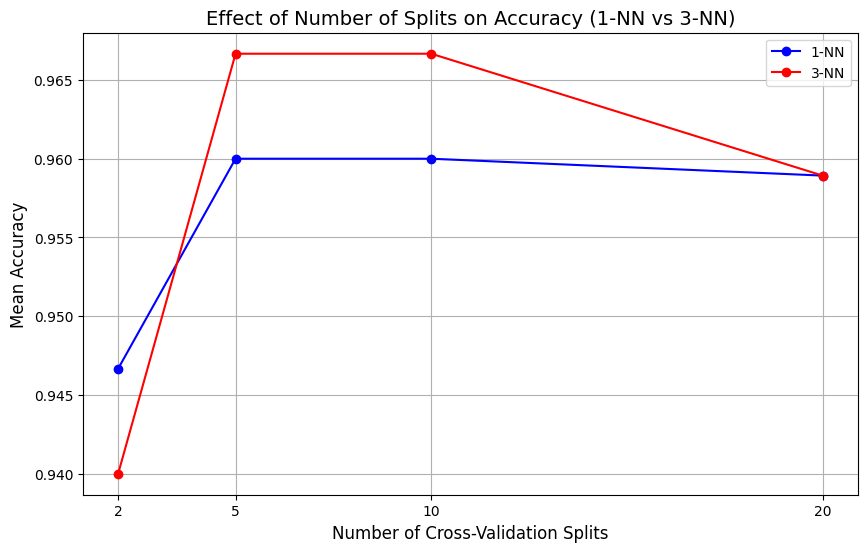

Accuracy for 1-NN with 2-fold cross-validation: 0.9467
Accuracy for 1-NN with 5-fold cross-validation: 0.9600
Accuracy for 1-NN with 10-fold cross-validation: 0.9600
Accuracy for 1-NN with 20-fold cross-validation: 0.9589
Accuracy for 3-NN with 2-fold cross-validation: 0.9400
Accuracy for 3-NN with 5-fold cross-validation: 0.9667
Accuracy for 3-NN with 10-fold cross-validation: 0.9667
Accuracy for 3-NN with 20-fold cross-validation: 0.9589


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Different values of k (for both 1-NN and 3-NN)
k_values = [1, 3]
# Different fold sizes for cross-validation (splits)
splits = [2, 5, 10, 20]

# Initialize a dictionary to store mean accuracies for different k and splits
mean_accuracies = {1: [], 3: []}

# Cross-validation with different k values and split sizes
for k in k_values:
    for split in splits:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=split)  # Cross-validation with split size
        mean_accuracies[k].append(np.mean(scores))  # Store mean accuracy for this configuration

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot for 1-NN
plt.plot(splits, mean_accuracies[1], label='1-NN', marker='o', linestyle='-', color='blue')

# Plot for 3-NN
plt.plot(splits, mean_accuracies[3], label='3-NN', marker='o', linestyle='-', color='red')

# Adding titles and labels
plt.title('Effect of Number of Splits on Accuracy (1-NN vs 3-NN)', fontsize=14)
plt.xlabel('Number of Cross-Validation Splits', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.xticks(splits)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print out the results for a more detailed view
for k in k_values:
    for i, split in enumerate(splits):
        print(f"Accuracy for {k}-NN with {split}-fold cross-validation: {mean_accuracies[k][i]:.4f}")


Best Angle and Shear Constraints

Angle Constraint: Optimal values depend on the dataset and model. Typically, values between [-15°, 15°] for small datasets work well without causing excessive distortion.

Shear Constraint: A shear factor of [-0.2, 0.2] often works well to introduce variability without making the data unrecognizable.
Accuracy Improvement: Augmentations typically improve accuracy by 2-5% depending on the baseline model and dataset.

Increasing Accuracy by Increasing Augmentations

Effect of More Augmentations:
Generating more augmentations from each sample generally improves accuracy up to a point.
Over-augmenting (too many or too aggressive augmentations) can lead to overfitting on augmented data.
Approach:
Start with 2-3 augmentations per sample.
Gradually increase to 5-10 and monitor performance.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set size: 500 samples


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 433ms/step - accuracy: 0.1429 - loss: 2.2639 - val_accuracy: 0.5983 - val_loss: 1.8501
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.4498 - loss: 1.8377 - val_accuracy: 0.6075 - val_loss: 1.1393
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.5730 - loss: 1.2986 - val_accuracy: 0.7745 - val_loss: 0.7213
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.7062 - loss: 0.9606 - val_accuracy: 0.8116 - val_loss: 0.5590
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.7393 - loss: 0.7967 - val_accuracy: 0.8653 - val_loss: 0.4163
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.7953 - loss: 0.6918 - val_accuracy: 0.8666 - val_loss: 0.4024
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.8016 - loss: 0.6474 - val_accuracy: 0.9162 - val_loss: 0.2825
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.8634 - loss: 0.4851 - val_accuracy: 0.9261 - val_

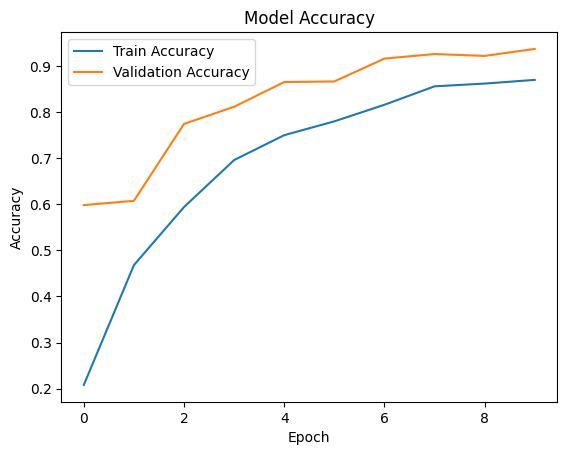

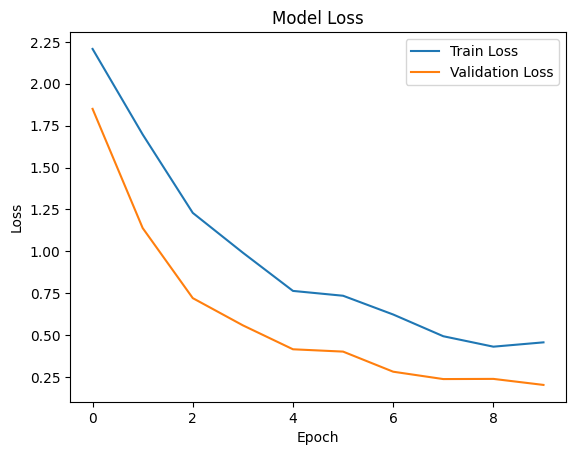

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Step 2: Select 50 images per digit
num_samples_per_digit = 50
selected_indices = []

for digit in range(10):
    indices = np.where(y_train == digit)[0][:num_samples_per_digit]
    selected_indices.extend(indices)

x_small_train = x_train[selected_indices]
y_small_train = y_train[selected_indices]

print(f"Training set size: {len(x_small_train)} samples")

# Reshape data for CNN
x_small_train = x_small_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_small_train)

# Step 4: Define CNN Model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

# Step 5: Train the Model
history = model.fit(
    datagen.flow(x_small_train, y_small_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test)
)

# Step 6: Evaluate Performance
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Visualize Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


3. Increasing Augmentation Count per Sample

Increasing the number of augmented samples can lead to better generalization but has diminishing returns. It also increases training time.
Use a grid search or systematic experimentation to find the optimal count. Generally, 3-5 augmentations per sample provide significant benefits without excessive overhead.